In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.ticker import FuncFormatter
import requests
import io

#Covid-19 in Serbia

The Covid-19 pandemic is one of the world’s defining health crises. The virus has quickly spread all over the world and has affected everyone’s lives in one way or another. Governments have tried many tactics such as lockdowns and social distancing to slow the spread of the virus and while some countries have gotten it under control, the overall case counts have been increasing at exponential rates. Serbia was slow to react at first and had a large initial spike in cases, then they were able to get in under control, however recently they have been seeing a second surge in cases.

In [165]:
locations = pd.read_csv('locations.csv')
location = locations.loc[locations['location'] == 'Serbia']

In [166]:
big_corona_data = pd.read_csv('owid-covid-data.csv')

In [167]:
SRB_corona = big_corona_data.loc[big_corona_data['iso_code'] == 'SRB']

In [168]:
cleaned_data = SRB_corona.drop(index = np.arange(33855, 33869)).drop(columns = ['aged_70_older', 'extreme_poverty'])

General Trends in Serbia's Covid-19 cases

Text(0.5, 1.0, 'Total Coronavirus Cases')

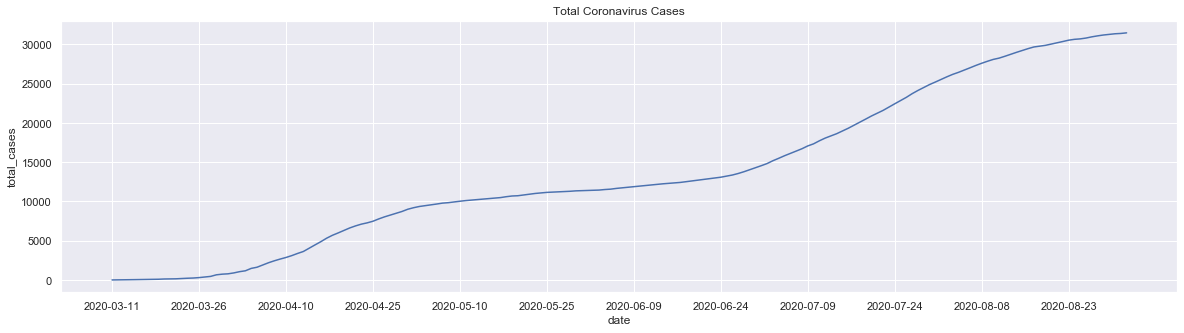

In [169]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(cleaned_data['date']))
ticks = plt.xticks(pos[::15], cleaned_data['date'].values[::15])
sns.lineplot(x = 'date', y = 'total_cases', color = 'b' ,data = cleaned_data).set_title('Total Coronavirus Cases')


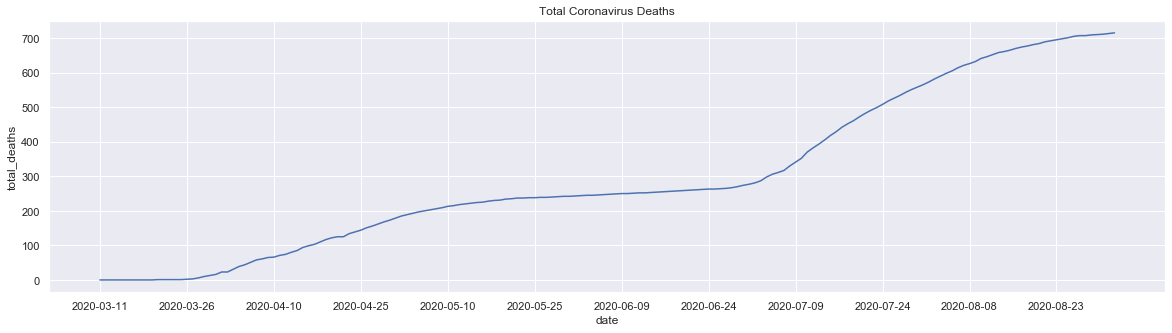

In [170]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(cleaned_data['date']))
ticks = plt.xticks(pos[::15], cleaned_data['date'].values[::15])
ax = sns.lineplot(x = 'date', y = 'total_deaths', color = 'b' ,data = cleaned_data).set_title('Total Coronavirus Deaths')


Text(0.5, 1.0, 'New Coronavirus Cases')

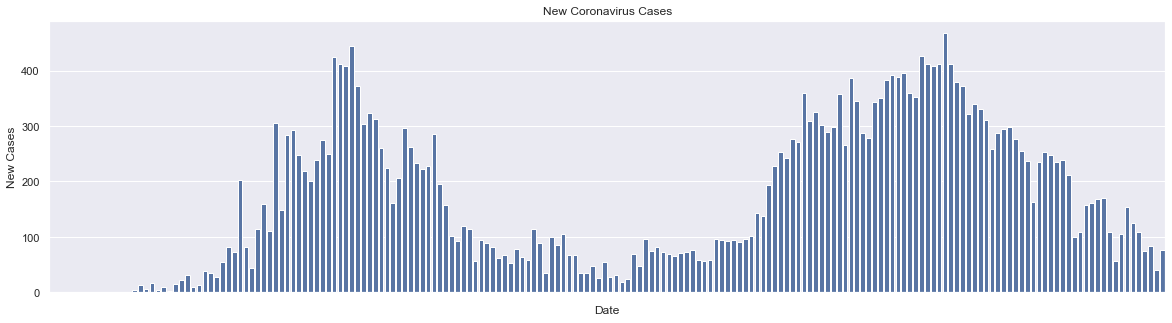

In [193]:
srb_rona = big_corona_data.loc[big_corona_data['iso_code'].isin(['SRB'])]
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='date', y='new_cases',color = 'b', data=srb_rona)
g.set(xticklabels=[])
g.set_xlabel("Date")
g.set_ylabel('New Cases')
g.set_title('New Coronavirus Cases')




Text(0.5, 1.0, 'New Coronavirus Deaths')

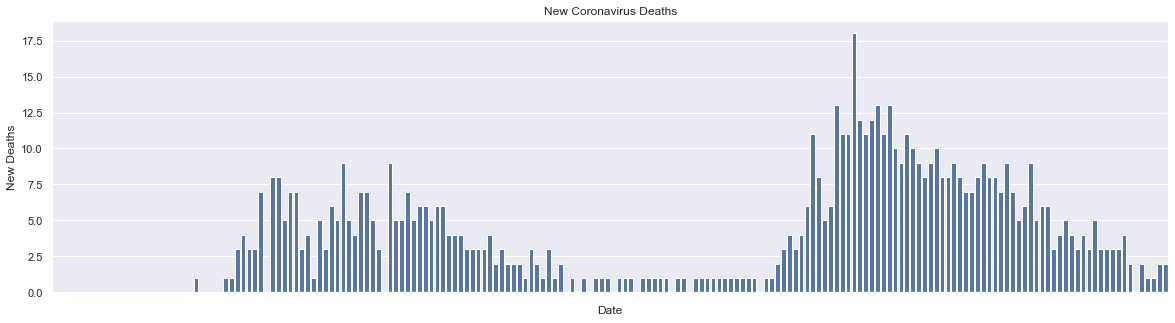

In [194]:
srb_rona = big_corona_data.loc[big_corona_data['iso_code'].isin(['SRB'])]
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
h = sns.barplot(x='date', y='new_deaths',color = 'b', data=srb_rona)
h.set(xticklabels=[])
h.set_xlabel("Date")
h.set_ylabel('New Deaths')
h.set_title('New Coronavirus Deaths')



In [173]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

big_testing_data = pd.read_csv(io.StringIO(download.decode('utf-8'))).drop(['Source URL', 'Notes', 'Source label'], 1)
testing_data = big_testing_data.loc[big_testing_data['ISO code'] == 'SRB']


Testing trends for Covid-19 in Serbia

Text(0.5, 1.0, 'Total Coronavirus Tests')

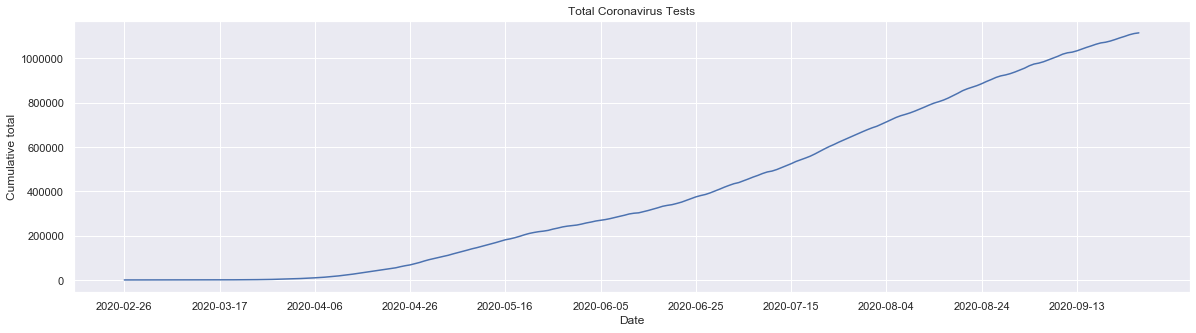

In [174]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(testing_data['Date']))
ticks = plt.xticks(pos[::20], testing_data['Date'].values[::20])
sns.lineplot(x = 'Date', y = 'Cumulative total', color = 'b' ,data = testing_data).set_title('Total Coronavirus Tests')

Text(0.5, 1.0, 'Daily Change in Coronavirus Testing')

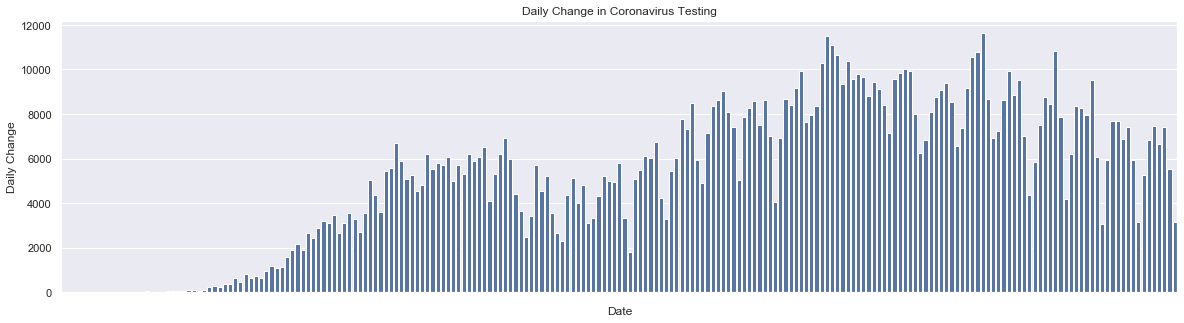

In [196]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
j = sns.barplot(x = 'Date', y = 'Daily change in cumulative total', color = 'b' ,data = testing_data)
j.set(xticklabels=[])
j.set_xlabel("Date")
j.set_ylabel('Daily Change')
j.set_title('Daily Change in Coronavirus Testing')



Text(0.5, 1.0, '7 Day average testing')

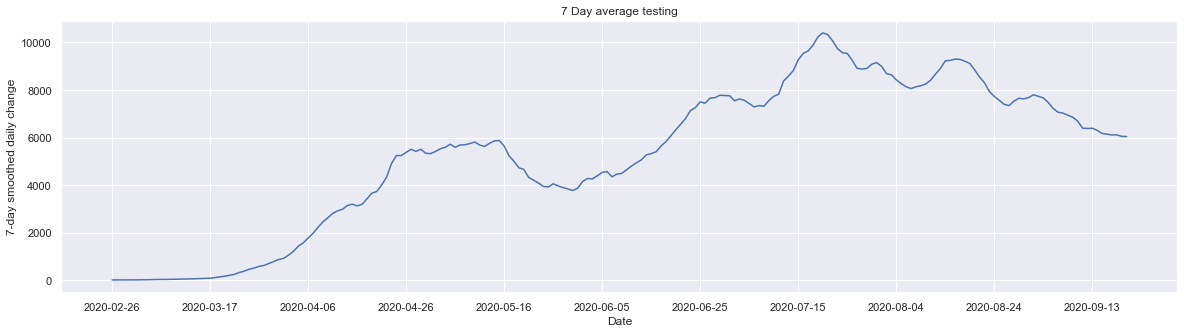

In [176]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(testing_data['Date']))
ticks = plt.xticks(pos[::20], testing_data['Date'].values[::20])
sns.lineplot(x = 'Date', y = '7-day smoothed daily change', color = 'b' ,data = testing_data).set_title('7 Day average testing')

Text(0.5, 1.0, 'Cumulative Tests Per Thousand')

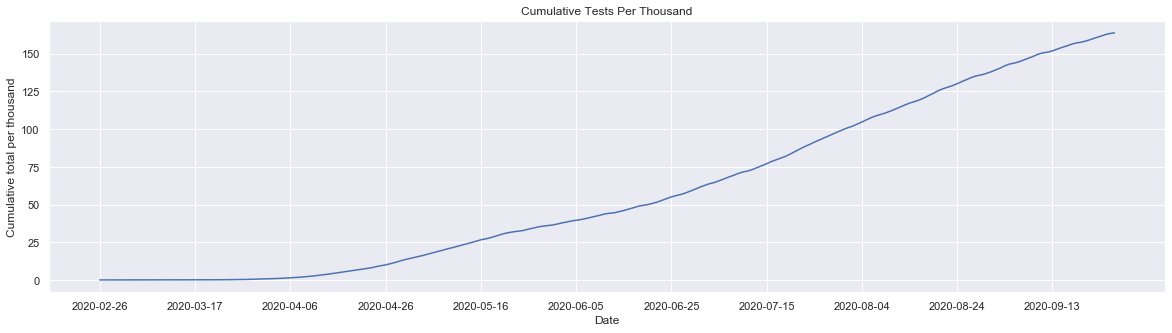

In [177]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(testing_data['Date']))
ticks = plt.xticks(pos[::20], testing_data['Date'].values[::20])
sns.lineplot(x = 'Date', y = 'Cumulative total per thousand', color = 'b' ,data = testing_data).set_title('Cumulative Tests Per Thousand')

Comparing Serbia to other European Countries adjusted for population: Coratia, France, Greece, and Italy.

In [178]:
more_countries_corona_data = big_corona_data.loc[big_corona_data['iso_code'].isin(['GRC', 'HRV', 'SRB', 'FRA', 'ITA'])]


Text(0, 0.5, 'Cases per Million')

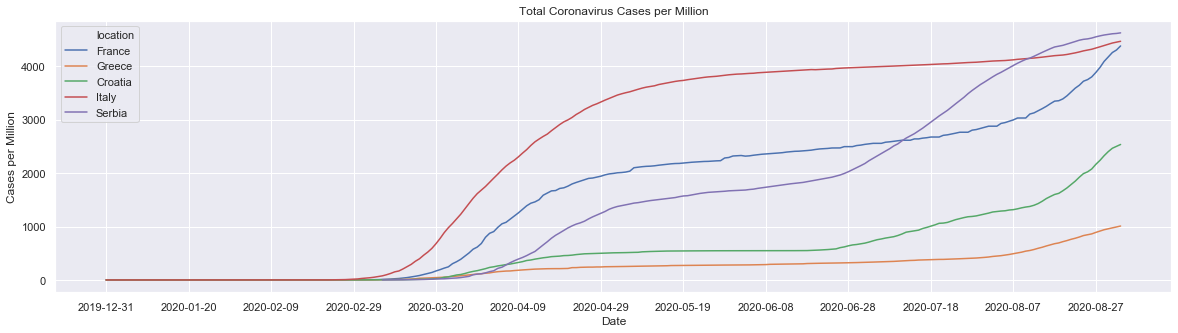

In [197]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
i = sns.lineplot(x = 'date', y = 'total_cases_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
i.set_title('Total Coronavirus Cases per Million')
i.set_xlabel('Date')
i.set_ylabel('Cases per Million')


Text(0, 0.5, 'New Coronavirus Cases per Million')

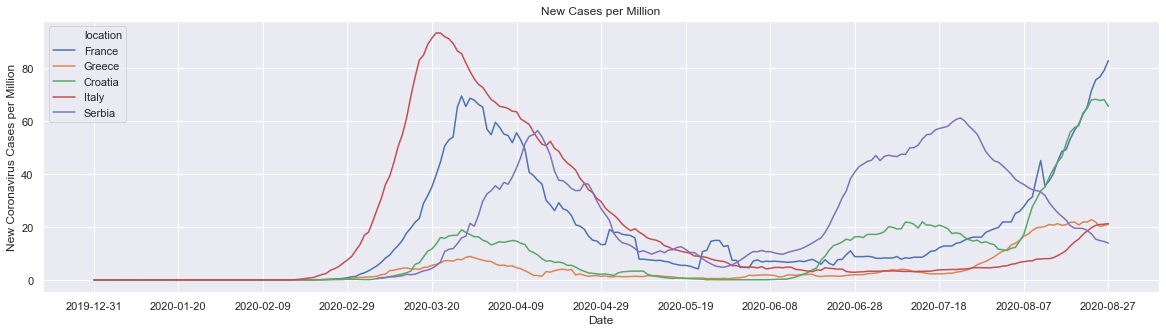

In [198]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
o = sns.lineplot(x = 'date', y = 'new_cases_smoothed_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
o.set_title('New Cases per Million')
o.set_xlabel('Date')
o.set_ylabel('New Coronavirus Cases per Million')



Text(0, 0.5, 'Deaths per Million')

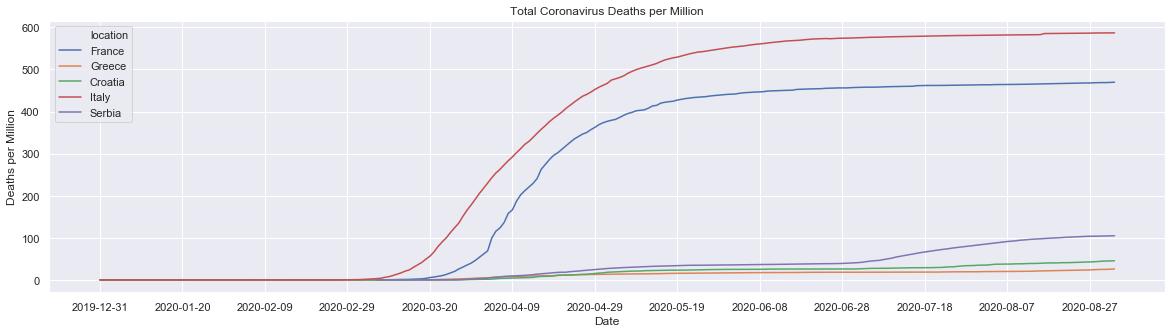

In [201]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
q = sns.lineplot(x = 'date', y = 'total_deaths_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
q.set_title('Total Coronavirus Deaths per Million')
q.set_xlabel('Date')
q.set_ylabel('Deaths per Million')


Text(0, 0.5, 'Deaths per Million')

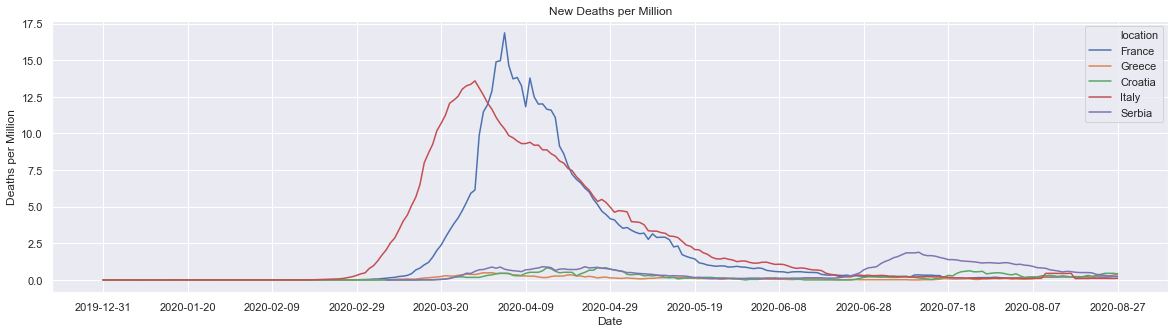

In [200]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
p = sns.lineplot(x = 'date', y = 'new_deaths_smoothed_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
p.set_title('New Deaths per Million')
p.set_xlabel('Date')
p.set_ylabel('Deaths per Million')



Text(0, 0.5, 'Population')

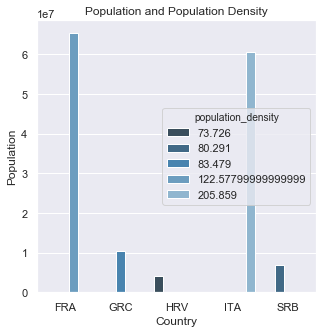

In [202]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
w = sns.barplot(x = 'iso_code', y = 'population', hue = 'population_density', palette="Blues_d" ,data = more_countries_corona_data)
w.set_title('Population and Population Density')
w.set_xlabel('Country')
w.set_ylabel('Population')

Text(0, 0.5, 'Life Expectancy')

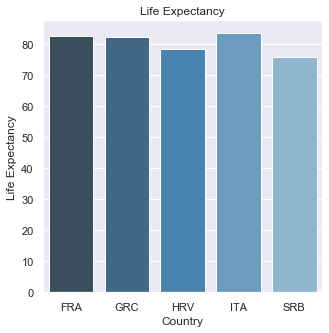

In [205]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
e = sns.barplot(x = 'iso_code', y = 'life_expectancy', palette="Blues_d" ,data = more_countries_corona_data)
e.set_title('Life Expectancy')
e.set_xlabel('Country')
e.set_ylabel('Life Expectancy')


Text(0, 0.5, 'Age')

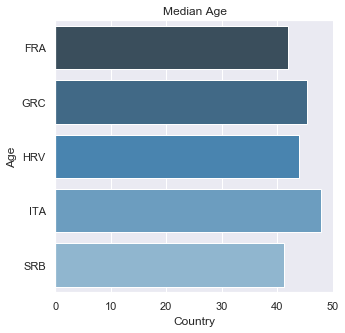

In [206]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x = 'median_age', y = 'iso_code', palette="Blues_d" ,data = more_countries_corona_data)
r.set_title('Median Age')
r.set_xlabel('Country')
r.set_ylabel('Age')


Text(0, 0.5, 'GDP')

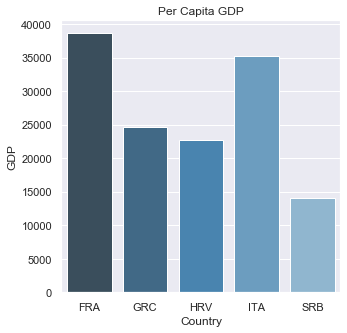

In [207]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
t = sns.barplot(x = 'iso_code', y = 'gdp_per_capita', palette="Blues_d" ,data = more_countries_corona_data)
t.set_title('Per Capita GDP')
t.set_xlabel('Country')
t.set_ylabel('GDP')

Text(0, 0.5, 'Poverty Rate')

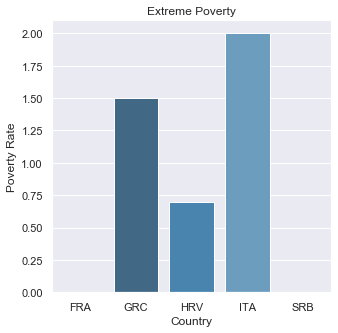

In [208]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
y = sns.barplot(x = 'iso_code', y = 'extreme_poverty', palette="Blues_d" ,data = more_countries_corona_data)
y.set_title('Extreme Poverty')
y.set_xlabel('Country')
y.set_ylabel('Poverty Rate')

How prepared is Serbia to deal with hospitalizations compared to the other countries

Text(0, 0.5, 'Hospital Beds')

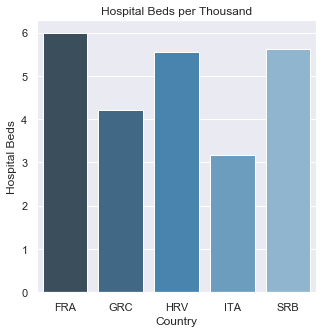

In [209]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
u = sns.barplot(x = 'iso_code', y = 'hospital_beds_per_thousand', palette="Blues_d" ,data = more_countries_corona_data)
u.set_title('Hospital Beds per Thousand')
u.set_xlabel('Country')
u.set_ylabel('Hospital Beds')


Pre-existing Conditions

Text(0, 0.5, 'Smokers')

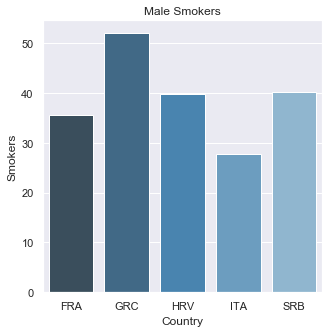

In [211]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
z = sns.barplot(x = 'iso_code', y = 'male_smokers', palette="Blues_d" ,data = more_countries_corona_data)
z.set_title('Male Smokers')
z.set_xlabel('Country')
z.set_ylabel('Smokers')


Text(0, 0.5, 'Smokers')

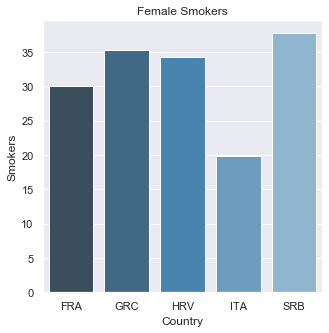

In [212]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = sns.barplot(x = 'iso_code', y = 'female_smokers', palette="Blues_d" ,data = more_countries_corona_data)
x.set_title('Female Smokers')
x.set_xlabel('Country')
x.set_ylabel('Smokers')


Text(0, 0.5, 'Prevalence')

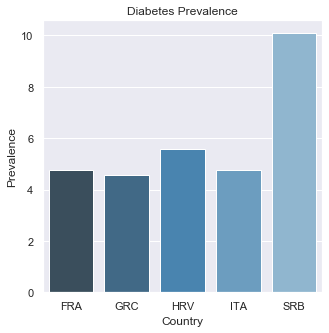

In [213]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
c = sns.barplot(x = 'iso_code', y = 'diabetes_prevalence', palette="Blues_d" ,data = more_countries_corona_data)
c.set_title('Diabetes Prevalence')
c.set_xlabel('Country')
c.set_ylabel('Prevalence')


Text(0, 0.5, 'Death Rate')

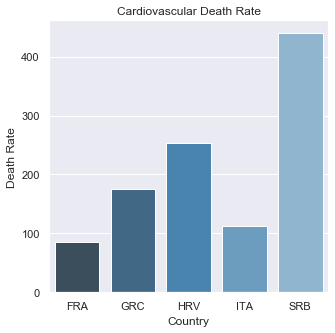

In [214]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
v = sns.barplot(x = 'iso_code', y = 'cardiovasc_death_rate', palette="Blues_d" ,data = more_countries_corona_data)
v.set_title('Cardiovascular Death Rate')
v.set_xlabel('Country')
v.set_ylabel('Death Rate')
